In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_volume = pd.read_csv('/content/drive/MyDrive/crops_dataset/individual_volumes/wheat_volume.csv')

In [7]:
df_volume.head()

,YearMonth,wheat_prod_vol,wheat_max_prod_vol
0,201401,"50,69,367","50,69,367"
1,201402,"55,14,224","55,14,224"
2,201403,"2,68,74,365","2,68,74,365"
3,201404,"15,48,54,829","15,48,54,829"
4,201405,"10,58,23,143","10,58,23,143"


In [8]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YearMonth           78 non-null     int64 
 1   wheat_prod_vol      78 non-null     object
 2   wheat_max_prod_vol  78 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [9]:
df_volume['YearMonth'] = df_volume['YearMonth'].astype(str)

# Extracting Year and Month
df_volume['year'] = df_volume['YearMonth'].str[:4].astype(int)
df_volume['month'] = df_volume['YearMonth'].str[4:].astype(int)

In [10]:
df_volume.head(5)

,YearMonth,wheat_prod_vol,wheat_max_prod_vol,year,month
0,201401,"50,69,367","50,69,367",2014,1
1,201402,"55,14,224","55,14,224",2014,2
2,201403,"2,68,74,365","2,68,74,365",2014,3
3,201404,"15,48,54,829","15,48,54,829",2014,4
4,201405,"10,58,23,143","10,58,23,143",2014,5


In [11]:
df_volume = df_volume.drop('YearMonth',axis=1)

In [12]:
df_volume.head(5)

,wheat_prod_vol,wheat_max_prod_vol,year,month
0,"50,69,367","50,69,367",2014,1
1,"55,14,224","55,14,224",2014,2
2,"2,68,74,365","2,68,74,365",2014,3
3,"15,48,54,829","15,48,54,829",2014,4
4,"10,58,23,143","10,58,23,143",2014,5


In [13]:
df_volume["wheat_prod_vol"].dtype
df_volume["wheat_max_prod_vol"].dtype

dtype('O')

In [14]:
import pandas as pd

# Assuming df_volume is your DataFrame
df_volume['wheat_prod_vol'] = df_volume['wheat_prod_vol'].astype(str)
df_volume['wheat_max_prod_vol'] = df_volume['wheat_max_prod_vol'].astype(str)

# Remove dot and characters after dot in 'wheat_prod_vol'
df_volume['wheat_prod_vol'] = df_volume['wheat_prod_vol'].str.replace(r'\.\d+', '', regex=True)
# Remove commas in 'wheat_prod_vol'
df_volume['wheat_prod_vol'] = df_volume['wheat_prod_vol'].str.replace(',', '')
# Convert 'wheat_prod_vol' to integer
df_volume['wheat_prod_vol'] = df_volume['wheat_prod_vol'].astype(int)

# Remove dot and characters after dot in 'wheat_max_prod_vol'
df_volume['wheat_max_prod_vol'] = df_volume['wheat_max_prod_vol'].str.replace(r'\.\d+', '', regex=True)
# Remove commas in 'wheat_max_prod_vol'
df_volume['wheat_max_prod_vol'] = df_volume['wheat_max_prod_vol'].str.replace(',', '')
# Convert 'wheat_max_prod_vol' to integer
df_volume['wheat_max_prod_vol'] = df_volume['wheat_max_prod_vol'].astype(int)


In [15]:
df_volume.head(5)

,wheat_prod_vol,wheat_max_prod_vol,year,month
0,5069367,5069367,2014,1
1,5514224,5514224,2014,2
2,26874365,26874365,2014,3
3,154854829,154854829,2014,4
4,105823143,105823143,2014,5


In [16]:
df_volume['year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

## Now i have to condense the information according to the volume available

In [17]:
df_volume

,wheat_prod_vol,wheat_max_prod_vol,year,month
0,5069367,5069367,2014,1
1,5514224,5514224,2014,2
2,26874365,26874365,2014,3
3,154854829,154854829,2014,4
4,105823143,105823143,2014,5
...,...,...,...,...
73,6132241,9804621,2020,2
74,16456842,19293317,2020,3
75,180107870,240559964,2020,4
76,52695390,81250278,2020,5


In [18]:
df_vol = df_volume

### Time - Series Models

In [19]:
import pandas as pd

# Assuming df_volume is your DataFrame with columns 'year' and 'month'
# If not, replace df_volume with your actual DataFrame

# Combine 'year' and 'month' into a datetime column
df_volume['time_series'] = pd.to_datetime(df_volume[['year', 'month']].assign(day=1))

# Drop the original 'year' and 'month' columns if needed
df_volume.drop(['year', 'month'], axis=1, inplace=True)

# Set the 'time_series' column as the index if needed
df_volume.set_index('time_series', inplace=True)

# Display the updated DataFrame
print(df_volume.head())



             wheat_prod_vol  wheat_max_prod_vol
time_series                                    
2014-01-01          5069367             5069367
2014-02-01          5514224             5514224
2014-03-01         26874365            26874365
2014-04-01        154854829           154854829
2014-05-01        105823143           105823143


In [20]:
df_volume

,wheat_prod_vol,wheat_max_prod_vol
time_series,,
2014-01-01,5069367,5069367
2014-02-01,5514224,5514224
2014-03-01,26874365,26874365
2014-04-01,154854829,154854829
2014-05-01,105823143,105823143
...,...,...
2020-02-01,6132241,9804621
2020-03-01,16456842,19293317
2020-04-01,180107870,240559964


In [21]:
df_vol_prod_vol = df_volume.loc[:,'wheat_prod_vol']

In [22]:
df_vol_prod_vol = df_vol_prod_vol.reset_index()

In [23]:
df_vol_prod_vol.head()

,time_series,wheat_prod_vol
0,2014-01-01,5069367
1,2014-02-01,5514224
2,2014-03-01,26874365
3,2014-04-01,154854829
4,2014-05-01,105823143


In [24]:
df_vol_prod_vol = df_vol_prod_vol.rename(columns={'time_series': 'date', 'wheat_prod_vol': 'volume'})

In [25]:
df_vol_prod_vol.describe()

,volume
count,7.800000e+01
mean,2.822988e+07
std,4.759334e+07
min,4.225423e+06
25%,6.172536e+06
50%,8.578916e+06
75%,1.671180e+07
max,1.901443e+08


## Importing all necessary libraries

In [26]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00


In [27]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.6 MB/s eta 0:00:00


In [28]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima Library
from pmdarima import ARIMA, auto_arima

# statsmodels Library
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast Library
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax, grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

In [29]:
df_vol_prod_vol

,date,volume
0,2014-01-01,5069367
1,2014-02-01,5514224
2,2014-03-01,26874365
3,2014-04-01,154854829
4,2014-05-01,105823143
...,...,...
73,2020-02-01,6132241
74,2020-03-01,16456842
75,2020-04-01,180107870
76,2020-05-01,52695390


In [30]:
data = df_vol_prod_vol

In [31]:
data

,date,volume
0,2014-01-01,5069367
1,2014-02-01,5514224
2,2014-03-01,26874365
3,2014-04-01,154854829
4,2014-05-01,105823143
...,...,...
73,2020-02-01,6132241
74,2020-03-01,16456842
75,2020-04-01,180107870
76,2020-05-01,52695390


In [32]:
data['date'].dtype

dtype('<M8[ns]')

In [33]:
data = data.set_index('date')

In [34]:
data = data.loc[:'2020-06-01 00:00:00']

In [35]:
data = data.asfreq('MS')

In [36]:
data = data['volume']
display(data.head(4))

date
2014-01-01      5069367
2014-02-01      5514224
2014-03-01     26874365
2014-04-01    154854829
Freq: MS, Name: volume, dtype: int64

Train dates: 2014-01-01 00:00:00 --- 2018-01-01 00:00:00 (n=49)
Test dates: 2018-02-01 00:00:00 --- 2020-06-01 00:00:00 (n=29)


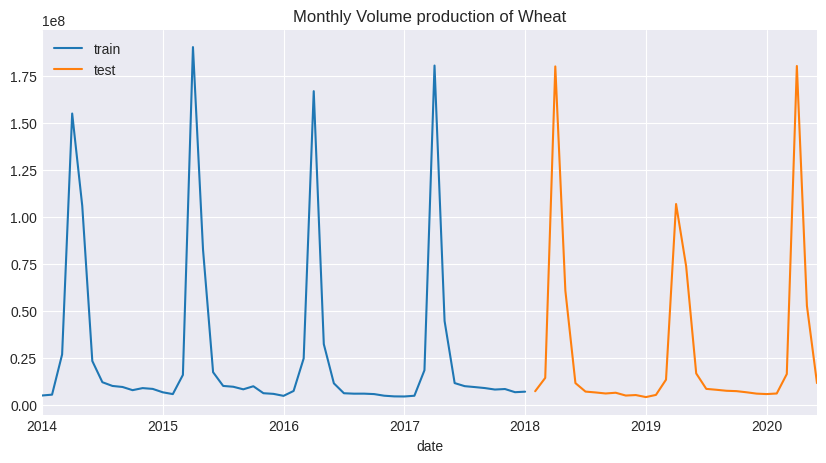

In [37]:
# Splitting Data into Train and Test Sets
fin_train = '2018-01-01 23:59:59'
print(f"Train dates: {data.index.min()} --- {data.loc[:fin_train].index.max()} (n={len(data.loc[:fin_train])})")
print(f"Test dates: {data.loc[fin_train:].index.min()} --- {data.loc[:].index.max()} (n={len(data.loc[fin_train:])})")
data_train = data.loc[:fin_train]
data_test = data.loc[fin_train:]

# Plotting the Data
fig, ax = plt.subplots(figsize=(10, 5))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.set_title('Monthly Volume production of Wheat')
ax.legend();

Assessing Stationarity and Identifying Model Parameters

In [38]:
# Testing Stationarity
warnings.filterwarnings("ignore")

# First and Second Order Differentiation
data_diff_1 = data_train.diff().dropna()
data_diff_2 = data_diff_1.diff().dropna()

# Original Series Stationarity Test
print('Original Series Stationarity Test')
adfuller_result = adfuller(data)
kpss_result = kpss(data)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

# Stationarity Test for First Order Differentiated Series
print('\nFirst Order Differentiation Stationarity Test')
adfuller_result = adfuller(data_diff_1)
kpss_result = kpss(data_diff_1)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

# Stationarity Test for Second Order Differentiated Series
print('\nSecond Order Differentiation Stationarity Test')
adfuller_result = adfuller(data_diff_2)
kpss_result = kpss(data_diff_2)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")

Original Series Stationarity Test
ADF Statistic: -1.7755237528317354, p-value: 0.3926793788516645
KPSS Statistic: 0.04730388522157161, p-value: 0.1

First Order Differentiation Stationarity Test
ADF Statistic: -25.79952553057869, p-value: 0.0
KPSS Statistic: 0.32728333172961044, p-value: 0.1

Second Order Differentiation Stationarity Test
ADF Statistic: -15.274876734287425, p-value: 4.662720006451285e-28
KPSS Statistic: 0.20153069876043697, p-value: 0.1


We test the following hypotheses in the ADF test.

Null Hypothesis(H0): The time series is non-stationary

Alternative Hypothesis(H1): The time series is regarded as stationary.

When we implement the ADF test in Python or R, we get the following outputs:

The p-value
The value of the test statistic
Number of lags considered for the test
The critical value cutoffs.
The hypotheses testing is done based on the p-value that is received as output. If the p-value is less than a particular level(e.g., alpha=0.05), then, in that case, the null hypothesis is rejected. The time series is stationary in that case.

On the other hand, if the p-value comes out to be greater than a particular level, then the null hypothesis is accepted(we fail to reject it); hence the time series is not stationary in this case.

In this the critical values go like

'1%': -3.431

'5%': -2.862

'10%': -2.567

Autocorrelation Plots for Original and Differentiated Series

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


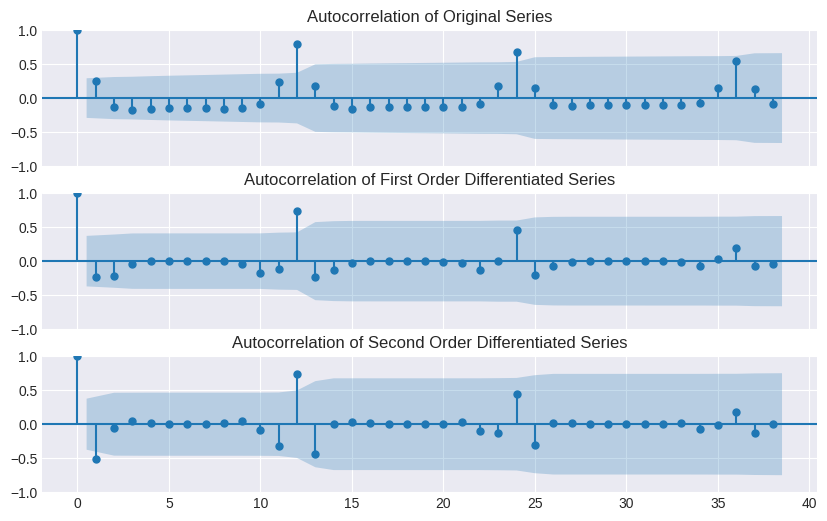

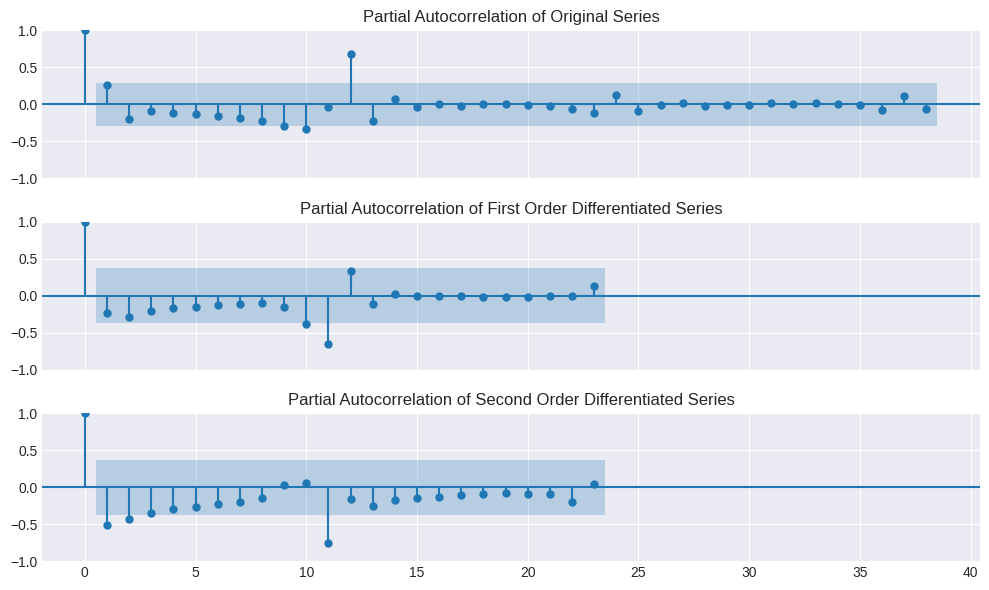

In [39]:
# Plotting ACF for Original and Differentiated Series
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)
plot_acf(data, ax=axs[0], lags=38, alpha=0.01)
axs[0].set_title('Autocorrelation of Original Series')
plot_acf(data_diff_1, ax=axs[1], lags=38, alpha=0.01)
axs[1].set_title('Autocorrelation of First Order Differentiated Series')
plot_acf(data_diff_2, ax=axs[2], lags=38, alpha=0.01)
axs[2].set_title('Autocorrelation of Second Order Differentiated Series')


# Plotting PACF for Original and Differentiated Series
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)
plot_pacf(data, ax=axs[0], lags=38, alpha=0.01)
axs[0].set_title('Partial Autocorrelation of Original Series')
plot_pacf(data_diff_1, ax=axs[1], lags=23, alpha=0.01)
axs[1].set_title('Partial Autocorrelation of First Order Differentiated Series')
plot_pacf(data_diff_2, ax=axs[2], lags=23, alpha=0.01)
axs[2].set_title('Partial Autocorrelation of Second Order Differentiated Series')
plt.tight_layout();

Parameter Selection Insights
Based on the ACF and PACF plots, we infer the following:

p (AR term): The PACF plot suggests an optimal value of 0 for p. However, to include an autoregressive component, we'll assign a value of 1.
q (MA term): The ACF plot indicates a value of 1 for q.

## Unveiling the Components of Time Series Data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


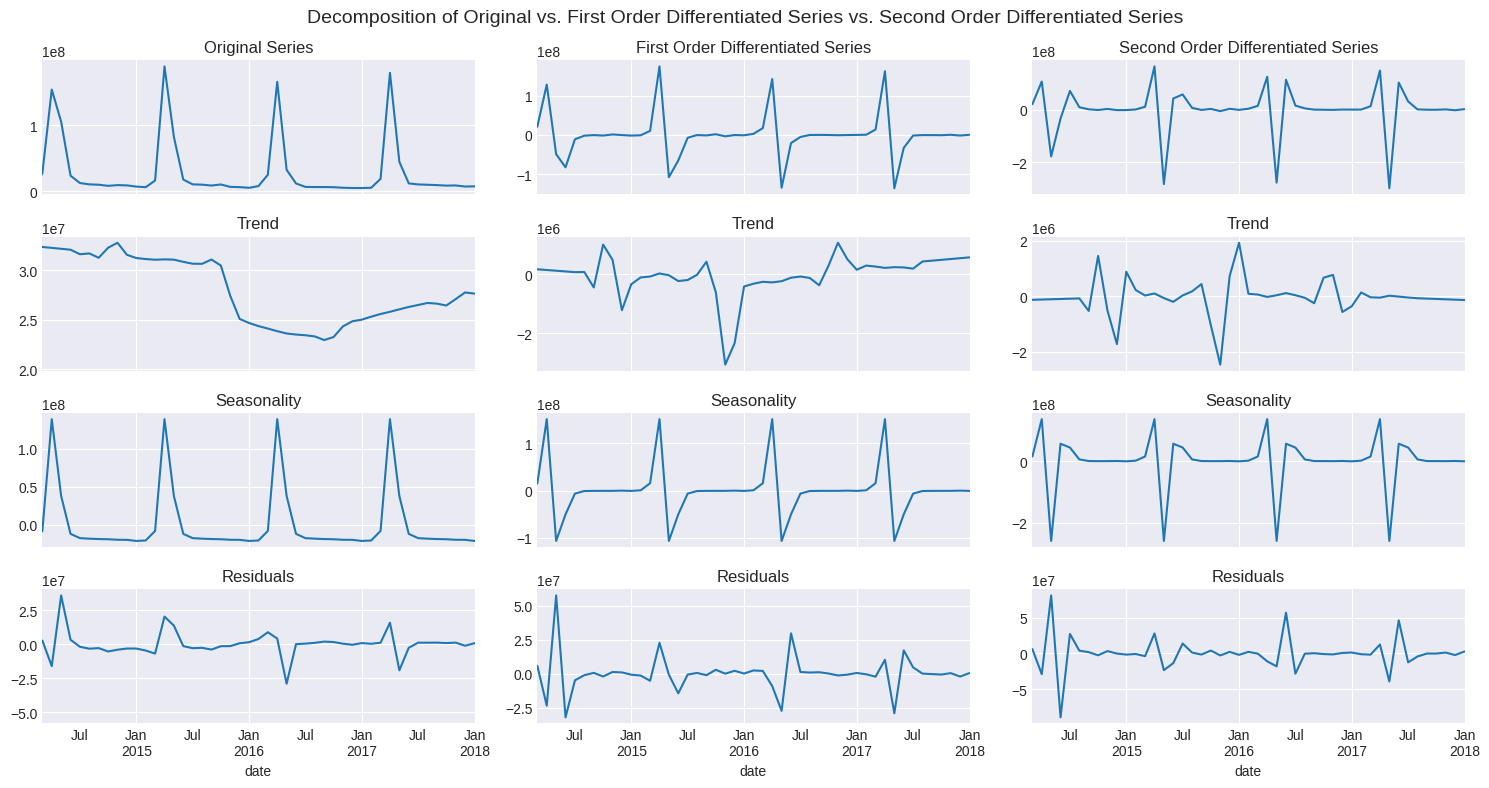

In [40]:
# Implementing Time Series Decomposition

# Decomposing the Original and First Order Differentiated Series
res_decompose = seasonal_decompose(data, model='additive', period =12,extrapolate_trend='freq')
res_decompose_diff_1 = seasonal_decompose(data_diff_1, model='additive', period =12, extrapolate_trend='freq')
res_decompose_diff_2 = seasonal_decompose(data_diff_2, model='additive', period =12, extrapolate_trend='freq')

# Plotting the Decomposition Results
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 8), sharex=True)

# Original Series Decomposition
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Original Series')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Trend')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Seasonality')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuals')

# First Order Differentiated Series Decomposition
res_decompose_diff_1.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('First Order Differentiated Series')
res_decompose_diff_1.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Trend')
res_decompose_diff_1.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Seasonality')
res_decompose_diff_1.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuals')


# First Order Differentiated Series Decomposition
res_decompose_diff_2.observed.plot(ax=axs[0, 2])
axs[0, 2].set_title('Second Order Differentiated Series')
res_decompose_diff_2.trend.plot(ax=axs[1, 2])
axs[1, 2].set_title('Trend')
res_decompose_diff_2.seasonal.plot(ax=axs[2, 2])
axs[2, 2].set_title('Seasonality')
res_decompose_diff_2.resid.plot(ax=axs[3, 2])
axs[3, 2].set_title('Residuals')

fig.suptitle('Decomposition of Original vs. First Order Differentiated Series vs. Second Order Differentiated Series', fontsize=14)
fig.tight_layout();

First-Order and Seasonal Differentiation
First-Order Differentiation: Captures transitions between observations, highlighting short-term dynamics.


Seasonal Differentiation: Addresses changes on a yearly basis, essential for modeling the observed 12-month cyclical pattern.
Implementing Combined Differentiation.

In [41]:
# Applying First-Order and Seasonal Differentiation
data_diff_1_12 = data_train.diff().diff(12).dropna()

# Stationarity Tests on Combined Differentiated Data
warnings.filterwarnings("ignore")
adfuller_result = adfuller(data_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(data_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -7.038895393823509, p-value: 5.916945248109574e-10
KPSS Statistic: 0.36191349967302167, p-value: 0.09357176738231825


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


These results indicate that the combined differentiation approach effectively achieves stationarity, a prerequisite for ARIMA modeling.

# Statsmodels

In [42]:
# SARIMAX Model with statsmodels
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
model = SARIMAX(endog=data_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_res = model.fit(disp=0)
warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecate

Summary

In [43]:
model_res.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             volume   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -634.983
Date:                            Fri, 01 Mar 2024   AIC                           1279.966
Time:                                    15:42:09   BIC                           1287.883
Sample:                                01-01-2014   HQIC                          1282.729
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.249     -0.504      0.614      -0.613       0.362
ma.L1         -0.6141      0.236     -2.607      0.009      -1.076      -0.152
ar.S.L12      -0.6302      0.135     -4.657      0.000      -0.895      -0.365
ma.S.L12       0.9601      0.230      4.179      0.000       0.510       1.410
sigma2      1.223e+14   2.31e-15    5.3e+28      0.000    1.22e+14    1.22e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                52.11
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.52e+44. Standard errors may be unstable.
"""

Covariance Type: Specifies the type of covariance estimator used in the model. "opg" stands for "outer product of gradients," which is one method for estimating the covariance matrix of the parameter estimates.

coef: The estimated coefficients for each parameter in the model. For example, "ar.L1" refers to the autoregressive coefficient at lag 1.

std err: The standard error of the coefficient estimates. It measures the variability of the estimated coefficients.

z: The z-statistic for the coefficient estimates. It indicates how many standard deviations the estimated coefficient is from zero.

P>|z|: The p-value associated with the z-statistic. It indicates the significance of the coefficient estimate. Values less than 0.05 are typically considered statistically significant.

[0.025 0.975]: The 95% confidence interval for the coefficient estimates. It provides a range of values within which we are 95% confident the true coefficient lies.

sigma2: The estimated variance of the error term in the model. It represents the variability of the observations around the model's predictions.

Ljung-Box (L1) (Q): The Ljung-Box test statistic for testing the null hypothesis of no autocorrelation in the residuals at lag 1. A low value indicates no significant autocorrelation.

Jarque-Bera (JB): The Jarque-Bera test statistic for testing the null hypothesis of normality in the residuals. A high value indicates departure from normality.

Prob(Q): The p-value associated with the Ljung-Box test statistic. Values close to 1 indicate no significant autocorrelation.

Prob(JB): The p-value associated with the Jarque-Bera test statistic. Values less than 0.05 suggest departure from normality.

Heteroskedasticity (H): Indicates the presence of heteroskedasticity in the residuals. Values closer to 1 indicate homoscedasticity (constant variance).

Prob(H) (two-sided): The p-value associated with the test for heteroskedasticity. Values less than 0.05 suggest heteroskedasticity.

Skew: The skewness of the residuals. It measures the symmetry of the residuals distribution. Negative skewness indicates a longer left tail.

Kurtosis: The kurtosis of the residuals. It measures the heaviness of the tails of the residuals distribution. Higher kurtosis indicates heavier tails than a normal distribution.

 Predicting Test Data Values

In [44]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2014-01-01      5069367
2014-02-01      5514224
2014-03-01     26874365
2014-04-01    154854829
2014-05-01    105823143
                ...    
2020-02-01      6132241
2020-03-01     16456842
2020-04-01    180107870
2020-05-01     52695390
2020-06-01     11656912
Freq: MS, Name: volume, Length: 78, dtype: int64

In [45]:
# Making Predictions
predictions_statsmodels = model_res.get_forecast(steps=len(data_test)).predicted_mean
predictions_statsmodels.name = 'predictions_statsmodels'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
predictions_statsmodels


2018-02-01    6.125546e+06
2018-03-01    1.302287e+07
2018-04-01    1.787987e+08
2018-05-01    4.457429e+07
2018-06-01    1.195524e+07
2018-07-01    1.275097e+07
2018-08-01    1.264309e+07
2018-09-01    1.163838e+07
2018-10-01    1.179054e+07
2018-11-01    1.115308e+07
2018-12-01    6.964936e+06
2019-01-01    8.741733e+06
2019-02-01    8.794003e+06
2019-03-01    1.986555e+07
2019-04-01    1.831719e+08
2019-05-01    4.801503e+07
2019-06-01    1.517133e+07
2019-07-01    1.443510e+07
2019-08-01    1.408998e+07
2019-09-01    1.338625e+07
2019-10-01    1.294876e+07
2019-11-01    1.288439e+07
2019-12-01    1.027609e+07
2020-01-01    1.110707e+07
2020-02-01    1.051352e+07
2020-03-01    1.895443e+07
2020-04-01    1.838171e+08
2020-05-01    4.924785e+07
2020-06-01    1.654573e+07
Freq: MS, Name: predictions_statsmodels, dtype: float64

# For the next 4 years prediction - Statsmodel

In [47]:
# Making Predictions for the next 4 years (48 months)
forecast_steps = 48
forecast = model_res.get_forecast(steps=forecast_steps).predicted_mean

# Adding the forecast to the original data index to get the dates
forecast_dates = pd.date_range(start=data_test.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_dates = forecast_dates.map(lambda x: x.replace(day=1))  # Set day to 1 for each date
forecast.index = forecast_dates

# Displaying the forecast
print(forecast)

2020-07-01    6.125546e+06
2020-08-01    1.302287e+07
2020-09-01    1.787987e+08
2020-10-01    4.457429e+07
2020-11-01    1.195524e+07
2020-12-01    1.275097e+07
2021-01-01    1.264309e+07
2021-02-01    1.163838e+07
2021-03-01    1.179054e+07
2021-04-01    1.115308e+07
2021-05-01    6.964936e+06
2021-06-01    8.741733e+06
2021-07-01    8.794003e+06
2021-08-01    1.986555e+07
2021-09-01    1.831719e+08
2021-10-01    4.801503e+07
2021-11-01    1.517133e+07
2021-12-01    1.443510e+07
2022-01-01    1.408998e+07
2022-02-01    1.338625e+07
2022-03-01    1.294876e+07
2022-04-01    1.288439e+07
2022-05-01    1.027609e+07
2022-06-01    1.110707e+07
2022-07-01    1.051352e+07
2022-08-01    1.895443e+07
2022-09-01    1.838171e+08
2022-10-01    4.924785e+07
2022-11-01    1.654573e+07
2022-12-01    1.677495e+07
2023-01-01    1.657935e+07
2023-02-01    1.568594e+07
2023-03-01    1.562005e+07
2023-04-01    1.519451e+07
2023-05-01    1.159058e+07
2023-06-01    1.301762e+07
2023-07-01    1.283108e+07
2

# SkForecast

In [48]:
# SARIMAX Model with skforecast.Sarimax
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
model = Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model.fit(y=data_train)
model.summary()
warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecate

Summary

In [49]:
model.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             volume   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -634.983
Date:                            Fri, 01 Mar 2024   AIC                           1279.966
Time:                                    15:42:10   BIC                           1287.883
Sample:                                01-01-2014   HQIC                          1282.729
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.249     -0.504      0.614      -0.613       0.362
ma.L1         -0.6141      0.236     -2.607      0.009      -1.076      -0.152
ar.S.L12      -0.6302      0.135     -4.657      0.000      -0.895      -0.365
ma.S.L12       0.9601      0.230      4.179      0.000       0.510       1.410
sigma2      1.223e+14   2.31e-15    5.3e+28      0.000    1.22e+14    1.22e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                52.11
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.52e+44. Standard errors may be unstable.
"""

Predicting Test Data Values

In [50]:
# Making Predictions
skforecast_predictions = model.predict(steps=len(data_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
print(skforecast_predictions)

                    pred
2018-02-01  6.125546e+06
2018-03-01  1.302287e+07
2018-04-01  1.787987e+08
2018-05-01  4.457429e+07
2018-06-01  1.195524e+07
2018-07-01  1.275097e+07
2018-08-01  1.264309e+07
2018-09-01  1.163838e+07
2018-10-01  1.179054e+07
2018-11-01  1.115308e+07
2018-12-01  6.964936e+06
2019-01-01  8.741733e+06
2019-02-01  8.794003e+06
2019-03-01  1.986555e+07
2019-04-01  1.831719e+08
2019-05-01  4.801503e+07
2019-06-01  1.517133e+07
2019-07-01  1.443510e+07
2019-08-01  1.408998e+07
2019-09-01  1.338625e+07
2019-10-01  1.294876e+07
2019-11-01  1.288439e+07
2019-12-01  1.027609e+07
2020-01-01  1.110707e+07
2020-02-01  1.051352e+07
2020-03-01  1.895443e+07
2020-04-01  1.838171e+08
2020-05-01  4.924785e+07
2020-06-01  1.654573e+07


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# For the next 4 years - Skforecast

In [52]:
# Making Predictions for the next 4 years (48 months)
forecast_steps = 48
forecastsm = model.predict(steps=forecast_steps)

# Adding the forecast to the original data index to get the dates
forecast_dates = pd.date_range(start=data_test.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_dates = forecast_dates.map(lambda x: x.replace(day=1))  # Set day to 1 for each date
forecastsm.index = forecast_dates

# Displaying the forecast
print(forecastsm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                    pred
2020-07-01  6.125546e+06
2020-08-01  1.302287e+07
2020-09-01  1.787987e+08
2020-10-01  4.457429e+07
2020-11-01  1.195524e+07
2020-12-01  1.275097e+07
2021-01-01  1.264309e+07
2021-02-01  1.163838e+07
2021-03-01  1.179054e+07
2021-04-01  1.115308e+07
2021-05-01  6.964936e+06
2021-06-01  8.741733e+06
2021-07-01  8.794003e+06
2021-08-01  1.986555e+07
2021-09-01  1.831719e+08
2021-10-01  4.801503e+07
2021-11-01  1.517133e+07
2021-12-01  1.443510e+07
2022-01-01  1.408998e+07
2022-02-01  1.338625e+07
2022-03-01  1.294876e+07
2022-04-01  1.288439e+07
2022-05-01  1.027609e+07
2022-06-01  1.110707e+07
2022-07-01  1.051352e+07
2022-08-01  1.895443e+07
2022-09-01  1.838171e+08
2022-10-01  4.924785e+07
2022-11-01  1.654573e+07
2022-12-01  1.677495e+07
2023-01-01  1.657935e+07
2023-02-01  1.568594e+07
2023-03-01  1.562005e+07
2023-04-01  1.519451e+07
2023-05-01  1.159058e+07
2023-06-01  1.301762e+07
2023-07-01  1.283108e+07
2023-08-01  2.292984e+07
2023-09-01  1.868117e+08


# pmdarima

In [53]:
from pmdarima import ARIMA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# SARIMAX Model with pmdarima.ARIMA


# Initialize the ARIMA model with the order and seasonal_order parameters
model_pm = ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Fit the model to your training data
model_pm.fit(data_train)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

summary

In [55]:
model_pm.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -634.990
Date:                            Fri, 01 Mar 2024   AIC                           1281.979
Time:                                    15:42:12   BIC                           1291.480
Sample:                                01-01-2014   HQIC                          1285.295
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.776e+05   1.35e-08  -5.01e+13      0.000   -6.78e+05   -6.78e+05
ar.L1         -0.1244      0.242     -0.514      0.607      -0.598       0.349
ma.L1         -0.6219      0.237     -2.626      0.009      -1.086      -0.158
ar.S.L12      -0.6317      0.131     -4.828      0.000      -0.888      -0.375
ma.S.L12       0.9590      0.220      4.363      0.000       0.528       1.390
sigma2      1.232e+14   2.24e-15    5.5e+28      0.000    1.23e+14    1.23e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                52.71
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.29e+44. Standard errors may be unstable.
"""

Test Data Predictions

In [56]:
pdmarima_predictions = model_pm.predict(len(data_test))
pdmarima_predictions.name = 'pdmarima_predictions'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
print(pdmarima_predictions)

2018-02-01    5.248231e+06
2018-03-01    1.190776e+07
2018-04-01    1.772962e+08
2018-05-01    4.273153e+07
2018-06-01    9.789912e+06
2018-07-01    1.023726e+07
2018-08-01    9.790429e+06
2018-09-01    8.451072e+06
2018-10-01    8.260116e+06
2018-11-01    7.301977e+06
2018-12-01    2.671941e+06
2019-01-01    4.139413e+06
2019-02-01    2.780300e+06
2019-03-01    1.323232e+07
2019-04-01    1.757799e+08
2019-05-01    3.989371e+07
2019-06-01    6.327867e+06
2019-07-01    4.857004e+06
2019-08-01    3.783789e+06
2019-09-01    2.354831e+06
2019-10-01    1.186876e+06
2019-11-01    4.030623e+05
2019-12-01   -2.966934e+06
2020-01-01   -2.854813e+06
2020-02-01   -5.126603e+06
2020-03-01    2.326977e+06
2020-04-01    1.660665e+08
2020-05-01    3.041237e+07
2020-06-01   -3.361840e+06
Freq: MS, Name: pdmarima_predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Making Predictions for the next 4 years (48 months)
forecast_steps = 48
forecastpm = model_pm.predict(n_periods=forecast_steps)

# Adding the forecast to the original data index to get the dates
forecast_dates = pd.date_range(start=data_test.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_dates = forecast_dates.map(lambda x: x.replace(day=1))  # Set day to 1 for each date
forecastpm.index = forecast_dates

# Displaying the forecast
print(forecastpm)


2020-07-01    5.248231e+06
2020-08-01    1.190776e+07
2020-09-01    1.772962e+08
2020-10-01    4.273153e+07
2020-11-01    9.789912e+06
2020-12-01    1.023726e+07
2021-01-01    9.790429e+06
2021-02-01    8.451072e+06
2021-03-01    8.260116e+06
2021-04-01    7.301977e+06
2021-05-01    2.671941e+06
2021-06-01    4.139413e+06
2021-07-01    2.780300e+06
2021-08-01    1.323232e+07
2021-09-01    1.757799e+08
2021-10-01    3.989371e+07
2021-11-01    6.327867e+06
2021-12-01    4.857004e+06
2022-01-01    3.783789e+06
2022-02-01    2.354831e+06
2022-03-01    1.186876e+06
2022-04-01    4.030623e+05
2022-05-01   -2.966934e+06
2022-06-01   -2.854813e+06
2022-07-01   -5.126603e+06
2022-08-01    2.326977e+06
2022-09-01    1.660665e+08
2022-10-01    3.041237e+07
2022-11-01   -3.361840e+06
2022-12-01   -4.223656e+06
2023-01-01   -5.503878e+06
2023-02-01   -7.478932e+06
2023-03-01   -8.632409e+06
2023-04-01   -1.012904e+07
2023-05-01   -1.489771e+07
2023-06-01   -1.453211e+07
2023-07-01   -1.683005e+07
2

# Visualization of Predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


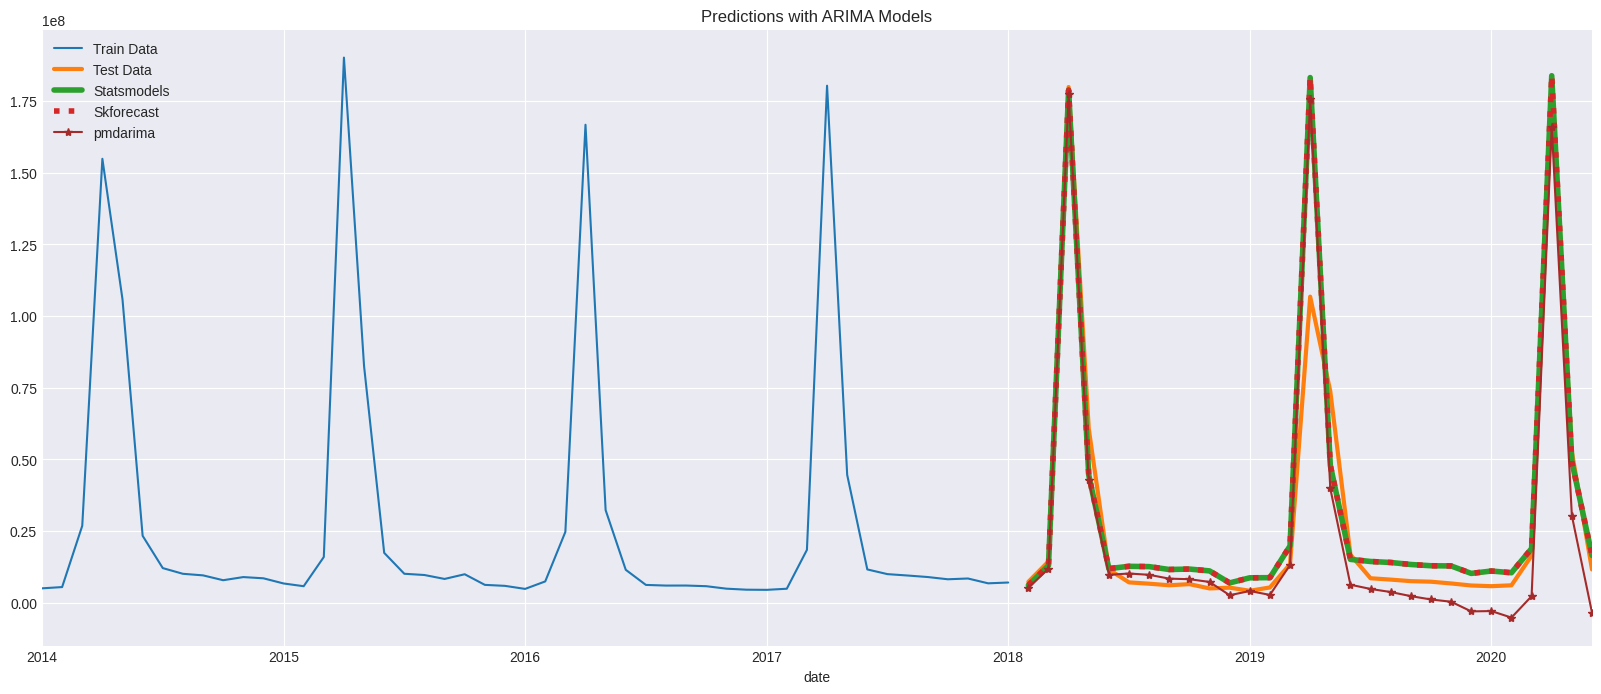

In [59]:
# Visualization of Predictions
fig, ax = plt.subplots(figsize=(20, 8))
data_train.plot(ax=ax, label='Train Data')
data_test.plot(ax=ax, label='Test Data', linewidth=3)
predictions_statsmodels.plot(ax=ax, label='Statsmodels',linewidth = 4)
skforecast_predictions.columns = ['Skforecast']
skforecast_predictions.plot(ax=ax, label='Skforecast', linestyle='dotted',linewidth = 4)
pdmarima_predictions.plot(ax=ax, label='pmdarima', marker='*',color='brown')
ax.set_title('Predictions with ARIMA Models')
ax.legend();

While pmdarima is essentially a wrapper for statsmodels.SARIMAX, the results may differ slightly due to the automated model selection process that pmdarima employs. This process can lead to subtle variations in model parameters and, consequently, the forecasts.

The selection of a specific library for ARIMA-SARIMAX modeling largely depends on the user’s preference, familiarity with Python libraries, and specific requirements of the time series data.

Statsmodels offers in-depth statistical analysis and manual control over model parameters.
Skforecast provides an intuitive, scikit-learn-like interface for users familiar with the Python ecosystem.
pmdarima shines in automating the process of model selection and parameter tuning, making it an efficient choice for users who prefer a more hands-off approach.
By leveraging these libraries, users can effectively model and forecast complex time series data, each offering a unique blend of functionality, ease of use, and flexibility.

The ForecasterSarimax class in skforecast is designed to train and validate ARIMA and SARIMAX models effectively, capitalizing on the skforecast API's strengths. It supports two implementations of ARIMA-SARIMAX: ARIMA from pmdarima and Sarimax from skforecast.

# Aggregating all the values into column for all the three models

In [60]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2014-01-01      5069367
2014-02-01      5514224
2014-03-01     26874365
2014-04-01    154854829
2014-05-01    105823143
                ...    
2020-02-01      6132241
2020-03-01     16456842
2020-04-01    180107870
2020-05-01     52695390
2020-06-01     11656912
Freq: MS, Name: volume, Length: 78, dtype: int64

In [61]:
# Extend the index until 2024-06-01
extended_index = pd.date_range(start=data.index.min(), end='2024-06-01', freq='MS')
df = data.reindex(extended_index)

# Display the extended DataFrame
print(df)

2014-01-01      5069367.0
2014-02-01      5514224.0
2014-03-01     26874365.0
2014-04-01    154854829.0
2014-05-01    105823143.0
                 ...     
2024-02-01            NaN
2024-03-01            NaN
2024-04-01            NaN
2024-05-01            NaN
2024-06-01            NaN
Freq: MS, Name: volume, Length: 126, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df = pd.DataFrame(df)

# Display the DataFrame
print(df)

                 volume
2014-01-01    5069367.0
2014-02-01    5514224.0
2014-03-01   26874365.0
2014-04-01  154854829.0
2014-05-01  105823143.0
...                 ...
2024-02-01          NaN
2024-03-01          NaN
2024-04-01          NaN
2024-05-01          NaN
2024-06-01          NaN

[126 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df = df.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,volume
0,2014-01-01,5069367.0
1,2014-02-01,5514224.0
2,2014-03-01,26874365.0
3,2014-04-01,154854829.0
4,2014-05-01,105823143.0
...,...,...
121,2024-02-01,NaN
122,2024-03-01,NaN
123,2024-04-01,NaN
124,2024-05-01,NaN


In [65]:
data_train.index[-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2018-01-01 00:00:00', freq='MS')

In [66]:

forecast_steps = 126
forecastsk = model.predict(steps=forecast_steps)

# Adding the forecast to the original data index to get the dates
forecast_dates = pd.date_range(start='2013-12-01 00:00:00', freq='MS', periods=forecast_steps+1)[1:]
forecast_dates = forecast_dates.map(lambda x: x.replace(day=1))  # Set day to 1 for each date
forecastsk.index = forecast_dates

# Displaying the forecast
print(forecastsk)


                    pred
2014-01-01  6.125546e+06
2014-02-01  1.302287e+07
2014-03-01  1.787987e+08
2014-04-01  4.457429e+07
2014-05-01  1.195524e+07
...                  ...
2024-02-01  3.677527e+07
2024-03-01  2.010513e+08
2024-04-01  6.626050e+07
2024-05-01  3.350502e+07
2024-06-01  3.337030e+07

[126 rows x 1 columns]


In [67]:
forecastsk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pred
2014-01-01,6.125546e+06
2014-02-01,1.302287e+07
2014-03-01,1.787987e+08
2014-04-01,4.457429e+07
2014-05-01,1.195524e+07
...,...
2024-02-01,3.677527e+07
2024-03-01,2.010513e+08
2024-04-01,6.626050e+07
2024-05-01,3.350502e+07


In [68]:
forecast_steps = 126

forecastsm = model_res.get_forecast(steps=forecast_steps).predicted_mean

# Adding the forecast to the original data index to get the dates
forecast_dates = pd.date_range(start='2013-12-01 00:00:00', periods=forecast_steps+1, freq='M')[1:]
forecast_dates = forecast_dates.map(lambda x: x.replace(day=1))  # Set day to 1 for each date
forecastsm.index = forecast_dates

# Displaying the forecast
print(forecastsm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2014-01-01    6.125546e+06
2014-02-01    1.302287e+07
2014-03-01    1.787987e+08
2014-04-01    4.457429e+07
2014-05-01    1.195524e+07
                  ...     
2024-02-01    3.677527e+07
2024-03-01    2.010513e+08
2024-04-01    6.626050e+07
2024-05-01    3.350502e+07
2024-06-01    3.337030e+07
Name: predicted_mean, Length: 126, dtype: float64


In [69]:
forecastsm = forecastsm.to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
forecastsm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,predicted_mean
2014-01-01,6.125546e+06
2014-02-01,1.302287e+07
2014-03-01,1.787987e+08
2014-04-01,4.457429e+07
2014-05-01,1.195524e+07
...,...
2024-02-01,3.677527e+07
2024-03-01,2.010513e+08
2024-04-01,6.626050e+07
2024-05-01,3.350502e+07


In [71]:
forecastsk = forecastsk.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
forecastsk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,pred
0,2014-01-01,6.125546e+06
1,2014-02-01,1.302287e+07
2,2014-03-01,1.787987e+08
3,2014-04-01,4.457429e+07
4,2014-05-01,1.195524e+07
...,...,...
121,2024-02-01,3.677527e+07
122,2024-03-01,2.010513e+08
123,2024-04-01,6.626050e+07
124,2024-05-01,3.350502e+07


In [73]:
df = df.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df = df.drop('level_0',axis=1)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,volume
0,2014-01-01,5069367.0
1,2014-02-01,5514224.0
2,2014-03-01,26874365.0
3,2014-04-01,154854829.0
4,2014-05-01,105823143.0
...,...,...
121,2024-02-01,NaN
122,2024-03-01,NaN
123,2024-04-01,NaN
124,2024-05-01,NaN


In [75]:
import pandas as pd

# Assuming df is the main dataframe and forecastsk is the forecast dataframe

# Merge df and forecastsk on the index column
merged_df = pd.merge(df, forecastsk, left_index=True, right_index=True)

# Display the merged dataframe
merged_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index_x,volume,index_y,pred
0,2014-01-01,5069367.0,2014-01-01,6.125546e+06
1,2014-02-01,5514224.0,2014-02-01,1.302287e+07
2,2014-03-01,26874365.0,2014-03-01,1.787987e+08
3,2014-04-01,154854829.0,2014-04-01,4.457429e+07
4,2014-05-01,105823143.0,2014-05-01,1.195524e+07
...,...,...,...,...
121,2024-02-01,NaN,2024-02-01,3.677527e+07
122,2024-03-01,NaN,2024-03-01,2.010513e+08
123,2024-04-01,NaN,2024-04-01,6.626050e+07
124,2024-05-01,NaN,2024-05-01,3.350502e+07


In [76]:
merged_df = merged_df.drop('index_y',axis=1)
merged_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index_x,volume,pred
0,2014-01-01,5069367.0,6.125546e+06
1,2014-02-01,5514224.0,1.302287e+07
2,2014-03-01,26874365.0,1.787987e+08
3,2014-04-01,154854829.0,4.457429e+07
4,2014-05-01,105823143.0,1.195524e+07
...,...,...,...
121,2024-02-01,NaN,3.677527e+07
122,2024-03-01,NaN,2.010513e+08
123,2024-04-01,NaN,6.626050e+07
124,2024-05-01,NaN,3.350502e+07


In [77]:
# Rename columns
merged_df = merged_df.rename(columns={'index_x': 'time', 'volume': 'actual_volume', 'pred': 'pred_volume'})




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
merged_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,actual_volume,pred_volume
0,2014-01-01,5069367.0,6.125546e+06
1,2014-02-01,5514224.0,1.302287e+07
2,2014-03-01,26874365.0,1.787987e+08
3,2014-04-01,154854829.0,4.457429e+07
4,2014-05-01,105823143.0,1.195524e+07
...,...,...,...
121,2024-02-01,NaN,3.677527e+07
122,2024-03-01,NaN,2.010513e+08
123,2024-04-01,NaN,6.626050e+07
124,2024-05-01,NaN,3.350502e+07


In [79]:
# Save merged_df to a CSV file
merged_df.to_csv('wheat_vol_df.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

# Training and Prediction with Forecaster Sarimax

Using skforecast’s Sarimax

In [80]:
# ARIMA Model with ForecasterSarimax and skforecast Sarimax
forecaster = ForecasterSarimax(
                regressor=Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            )
forecaster.fit(y=data_train, suppress_warnings=True)

# Prediction
predictions = forecaster.predict(steps=len(data_test))

# Backtesting

In [81]:
# Backtest Forecaster
forecaster = ForecasterSarimax(
                regressor=Sarimax(
                               order=(1, 1, 1),
                               seasonal_order=(1, 1, 1, 12),
                               maxiter=200
                           )
            )

metric, predictions_backtest = backtesting_sarimax(
                               forecaster=forecaster,
                               y=data,
                               initial_train_size=len(data_train),
                               fixed_train_size=False,
                               steps=12,
                               metric='mean_absolute_error',
                               refit=True,
                               n_jobs="auto",
                               suppress_warnings_fit=True,
                               verbose=True,
                               show_progress=True
                           )

print(f"Metric (mean absolute error): {metric}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 49
Number of observations used for backtesting: 29
    Number of folds: 3
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 5 observations.

Fold: 0
    Training:   2014-01-01 00:00:00 -- 2018-01-01 00:00:00  (n=49)
    Validation: 2018-02-01 00:00:00 -- 2019-01-01 00:00:00  (n=12)
Fold: 1
    Training:   2014-01-01 00:00:00 -- 2019-01-01 00:00:00  (n=61)
    Validation: 2019-02-01 00:00:00 -- 2020-01-01 00:00:00  (n=12)
Fold: 2
    Training:   2014-01-01 00:00:00 -- 2020-01-01 00:00:00  (n=73)
    Validation: 2020-02-01 00:00:00 -- 2020-06-01 00:00:00  (n=5)



  0%|          | 0/3 [00:00<?, ?it/s]

Metric (mean absolute error): 10651245.382656239


# Visualizing Backtesting Predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


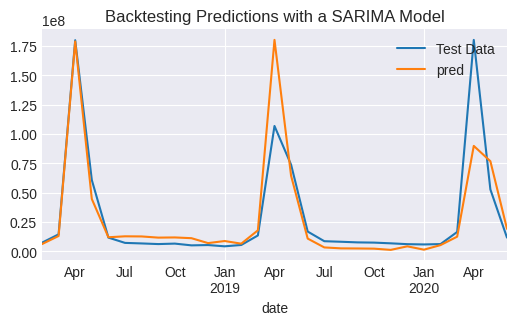

In [82]:
# Backtesting Graph Predictions
fig, ax = plt.subplots(figsize=(6, 3))
data.loc[fin_train:].plot(ax=ax, label='Test Data')
predictions_backtest.plot(ax=ax)
ax.set_title('Backtesting Predictions with a SARIMA Model')
ax.legend();

## Hyperparameter Optimzation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


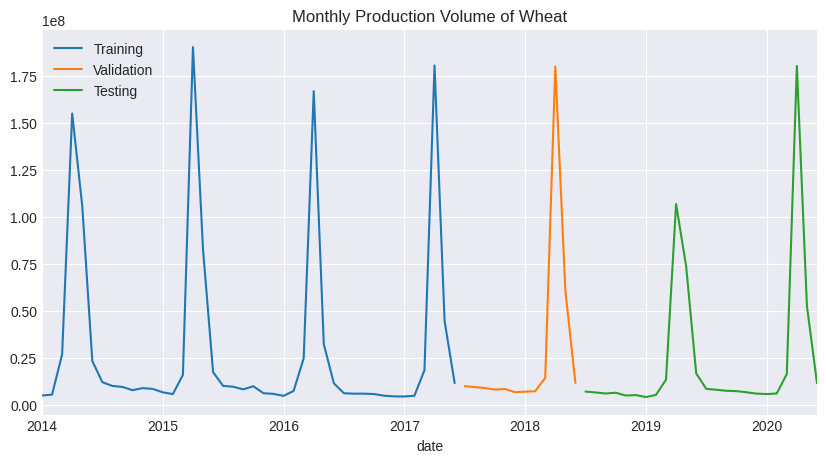

In [83]:
# Data Split for Model Evaluation
fin_train = '2017-06-01 23:59:59'
fin_val = '2018-06-01 23:59:59'

# Plotting Data Segments
fig, ax = plt.subplots(figsize=(10, 5))
data.loc[:fin_train].plot(ax=ax, label='Training')
data.loc[fin_train:fin_val].plot(ax=ax, label='Validation')
data.loc[fin_val:].plot(ax=ax, label='Testing')
ax.set_title('Monthly Production Volume of Wheat')
ax.legend();

# Grid Search Based on BackTesting

In [84]:
# Setting Up Forecaster for Grid Search
forecaster = ForecasterSarimax(
                regressor=Sarimax(order=(1, 1, 1), maxiter=500)
             )

# Defining Parameter Grid
param_grid = {
    'order': [(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1), (2, 1, 1), (0,0,2)],
    'seasonal_order': [(0, 0, 0, 0), (0, 1, 0, 12), (1, 1, 1, 12), (2, 1, 1, 12)],
    'trend': [None, 'n', 'c']
}

# Executing Grid Search
results_grid = grid_search_sarimax(
                    forecaster=forecaster,
                    y=data.loc[:fin_val],
                    param_grid=param_grid,
                    steps=12,
                    metric='mean_absolute_error',
                    initial_train_size=len(data_train),
                    fixed_train_size=False,
                    return_best=False,
                    n_jobs='auto',
                    suppress_warnings_fit=True,
                    verbose=False,
                    show_progress=True
               )

results_grid

Number of models compared: 72.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


params grid:   0%|          | 0/72 [00:00<?, ?it/s]

,params,mean_absolute_error,order,seasonal_order,trend
58,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, ...",3.349325e+06,"(2, 1, 1)","(2, 1, 1, 12)",n
57,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, ...",3.349325e+06,"(2, 1, 1)","(2, 1, 1, 12)",None
59,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, ...",3.497380e+06,"(2, 1, 1)","(2, 1, 1, 12)",c
45,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, ...",3.643839e+06,"(1, 1, 1)","(2, 1, 1, 12)",None
46,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, ...",3.643839e+06,"(1, 1, 1)","(2, 1, 1, 12)",n
...,...,...,...,...,...
61,"{'order': (0, 0, 2), 'seasonal_order': (0, 0, ...",5.415412e+07,"(0, 0, 2)","(0, 0, 0, 0)",n
60,"{'order': (0, 0, 2), 'seasonal_order': (0, 0, ...",5.415412e+07,"(0, 0, 2)","(0, 0, 0, 0)",None
14,"{'order': (0, 1, 1), 'seasonal_order': (0, 0, ...",6.269213e+07,"(0, 1, 1)","(0, 0, 0, 0)",c
50,"{'order': (2, 1, 1), 'seasonal_order': (0, 0, ...",6.460083e+07,"(2, 1, 1)","(0, 0, 0, 0)",c


'trend': This parameter specifies the trend type in the model. The grid search will consider the following options:

## None: No trend component.

## 'n': Non-seasonal trend.

## 'c': Constant trend.

# Auto-Arima: Optimizing with Akaike Information Criterion

In [85]:
# Executing Auto Arima to Minimize AIC
model = auto_arima(
            y=data.loc[:fin_val],
            start_p=0,
            start_q=0,
            max_p=3,
            max_q=3,
            seasonal=True,
            test='adf',
            m=12,  # Seasonality period
            d=None,  # Determined by the algorithm
            D=None,  # Determined by the algorithm
            trace=True,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1482.758, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1491.315, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1493.949, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1493.298, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1491.112, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1491.761, Time=0.09 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1492.441, Time=0.07 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1477.657, Time=0.38 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1479.725, Time=0.21 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1479.452, Time=0.60 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1478.685, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1478.351, Time=0.56 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=1473.521, Time=0.51 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1482.492, Time=0.46 sec
 ARIMA(0,0,1)(2,1,0

# Capturing Auto-Arima Trace

In [86]:
# Assuming 'data' and 'fin_val' are defined and contain the time series data
buffer = StringIO()
with contextlib.redirect_stdout(buffer):
    auto_arima(
        y=data.loc[:fin_val],
        start_p=0,
        start_q=0,
        max_p=3,
        max_q=3,
        seasonal=True,
        test='adf',
        m=12,  # Seasonality period
        d=None,  # Determined by the algorithm
        D=None,  # Determined by the algorithm
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
trace_autoarima = buffer.getvalue()

# Extracting model details from the trace using regex
pattern = r'ARIMA\((\d+),(\d+),(\d+)\)\((\d+),(\d+),(\d+)\)\[(\d+)\]\s+intercept\s*:\s+AIC=([\d\.]+), Time=([\d\.]+) sec'
matches = re.findall(pattern, trace_autoarima)

# Creating a DataFrame from the extracted data
data_for_df = []
for match in matches:
    data_for_df.append({
        'p': int(match[0]),
        'd': int(match[1]),
        'q': int(match[2]),
        'P': int(match[3]),
        'D': int(match[4]),
        'Q': int(match[5]),
        'm': int(match[6]),
        'AIC': float(match[7]),
        'Time': float(match[8])
    })

results = pd.DataFrame(data_for_df)
results_sorted = results.sort_values(by='AIC').reset_index(drop=True)

# Displaying the sorted results
print(results_sorted.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   p  d  q  P  D  Q   m       AIC  Time
0  0  0  2  2  1  1  12  1472.460  0.63
1  0  0  1  2  1  1  12  1473.521  0.46
2  1  0  2  2  1  1  12  1473.547  3.90
3  0  0  2  2  1  2  12  1473.764  1.03
4  0  0  3  2  1  1  12  1474.800  0.62


# Back-Testing Predictions

In [87]:
# Model Selected by Grid Search
forecaster_grid_search = ForecasterSarimax(
                            regressor=Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), maxiter=500)
                        )
metric_m1, predictions_m1 = backtesting_sarimax(
                               forecaster=forecaster,
                               y=data,
                               initial_train_size=len(data_train),
                               fixed_train_size=False,
                               steps=12,
                               metric='mean_absolute_error',
                               refit=True,
                               n_jobs="auto",
                               suppress_warnings_fit=True,
                               verbose=True,
                               show_progress=True
                           )

# Model Selected by Auto Arima
forecaster_auto_arima = ForecasterSarimax(
                            regressor=Sarimax(order=(0, 0, 2), seasonal_order=(2, 1, 1, 12), maxiter=500)
                        )
metric_m2, predictions_m2 = backtesting_sarimax(
                               forecaster=forecaster,
                               y=data,
                               initial_train_size=len(data_train),
                               fixed_train_size=False,
                               steps=12,
                               metric='mean_absolute_error',
                               refit=True,
                               n_jobs="auto",
                               suppress_warnings_fit=True,
                               verbose=True,
                               show_progress=True
                           )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 49
Number of observations used for backtesting: 29
    Number of folds: 3
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 5 observations.

Fold: 0
    Training:   2014-01-01 00:00:00 -- 2018-01-01 00:00:00  (n=49)
    Validation: 2018-02-01 00:00:00 -- 2019-01-01 00:00:00  (n=12)
Fold: 1
    Training:   2014-01-01 00:00:00 -- 2019-01-01 00:00:00  (n=61)
    Validation: 2019-02-01 00:00:00 -- 2020-01-01 00:00:00  (n=12)
Fold: 2
    Training:   2014-01-01 00:00:00 -- 2020-01-01 00:00:00  (n=73)
    Validation: 2020-02-01 00:00:00 -- 2020-06-01 00:00:00  (n=5)



  0%|          | 0/3 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 49
Number of observations used for backtesting: 29
    Number of folds: 3
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 5 observations.

Fold: 0
    Training:   2014-01-01 00:00:00 -- 2018-01-01 00:00:00  (n=49)
    Validation: 2018-02-01 00:00:00 -- 2019-01-01 00:00:00  (n=12)
Fold: 1
    Training:   2014-01-01 00:00:00 -- 2019-01-01 00:00:00  (n=61)
    Validation: 2019-02-01 00:00:00 -- 2020-01-01 00:00:00  (n=12)
Fold: 2
    Training:   2014-01-01 00:00:00 -- 2020-01-01 00:00:00  (n=73)
    Validation: 2020-02-01 00:00:00 -- 2020-06-01 00:00:00  (n=5)



  0%|          | 0/3 [00:00<?, ?it/s]

# Comparing Metrics

Metric (mean absolute error) of the grid search model: 9318983.740528649
Metric (mean absolute error) of the auto arima model: 9318983.740528649


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


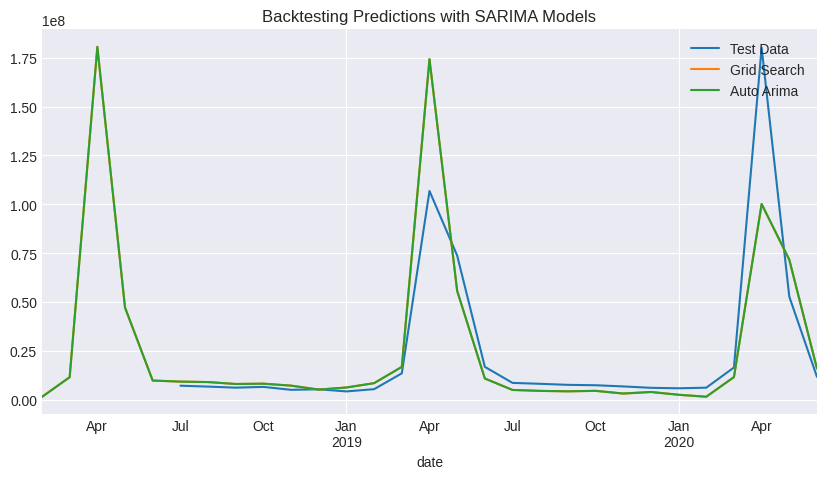

In [90]:
# Metric Comparison
print(f"Metric (mean absolute error) of the grid search model: {metric_m1}")
print(f"Metric (mean absolute error) of the auto arima model: {metric_m2}")

# Visualization of Backtesting Predictions
fig, ax = plt.subplots(figsize=(10, 5))
data.loc[fin_val:].plot(ax=ax, label='Test Data')
predictions_m1.rename(columns={'pred': 'Grid Search'}).plot(ax=ax)
predictions_m2.rename(columns={'pred': 'Auto Arima'}).plot(ax=ax)
ax.set_title('Backtesting Predictions with SARIMA Models')
ax.legend();